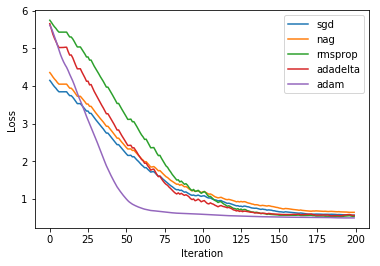

In [7]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
from sklearn import datasets as ds

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def train(x_train, y_train, x_test, y_test, method, iters, loss):
    iterations = 200
    theta = random.rand(num_features + 1)
    num_test_samples, num_test_features = x_test.shape

    if method == 'sgd':
        lr = 0.01

        for i in range(iterations):
            output = sigmoid(np.dot(x_train[i], theta))
            error = output - y_train[i]
            theta = theta - lr * np.dot(x_train[i], error)

            pred_error = 0
            for j in range(num_test_samples):
                pred_output = sigmoid(np.dot(x_test[j], theta))
                pred_error -= y_test[j] * np.log(pred_output) + (1 - y_test[j]) * np.log(1 - pred_output)
            iters.append(i)
            loss.append(pred_error / num_test_samples)

    if method == 'nag':
        lr = 0.01
        gamma = 0.9
        momentum = np.zeros(num_features + 1)

        for i in range(iterations):
            output = sigmoid(np.dot(x_train[i], theta - lr * gamma * momentum))
            error = output - y_train[i]
            grad = np.dot(x_train[i], error)
            momentum = momentum * lr + grad
            theta = theta - lr * momentum

            pred_error = 0
            for j in range(num_test_samples):
                pred_output = sigmoid(np.dot(x_test[j], theta))
                pred_error -= y_test[j] * np.log(pred_output) + (1 - y_test[j]) * np.log(1 - pred_output)
            iters.append(i)
            loss.append(pred_error / num_test_samples)

    if method == 'rmsprop':
        lr = 0.01
        G = 1
        gamma = 0.95
        delta = 10e-7

        for i in range(iterations):
            output = sigmoid(np.dot(x_train[i], theta))
            error = output - y_train[i]
            grad = np.dot(x_train[i], error)
            G = gamma * G + (1 - gamma) * (grad * grad)
            theta = theta - lr * grad / (np.sqrt(G) + delta)

            pred_error = 0
            for j in range(num_test_samples):
                pred_output = sigmoid(np.dot(x_test[j], theta))
                pred_error -= y_test[j] * np.log(pred_output) + (1 - y_test[j]) * np.log(1 - pred_output)
            iters.append(i)
            loss.append(pred_error / num_test_samples)

    if method == 'adam':
        delta = 10e-8
        beta = 0.9
        gamma = 0.999
        lr = 0.01
        m = 0
        G = 0

        for i in range(iterations):
            output = sigmoid(np.dot(x_train[i], theta))
            error = output - y_train[i]
            grad = np.dot(x_train[i], error)

            m = beta * m + (1 - beta) * grad
            G = gamma * G + (1 - gamma) * grad * grad
            delta_theta = (-lr * (m / (1 - beta))) / (np.sqrt(G / (1 - gamma)) + delta)
            theta = theta + delta_theta

            pred_error = 0
            for j in range(num_test_samples):
                pred_output = sigmoid(np.dot(x_test[j], theta))
                pred_error -= y_test[j] * np.log(pred_output) + (1 - y_test[j]) * np.log(1 - pred_output)
            iters.append(i)
            loss.append(pred_error / num_test_samples)

    if method == 'adadelta':
        G = 0
        t = 0
        gamma = 0.9
        delta = 10e-7
        lr = 10

        for i in range(iterations):
            output = sigmoid(np.dot(x_train[i], theta))
            error = output - y_train[i]
            grad = np.dot(x_train[i], error)

            G = gamma * G + (1 - gamma) * grad * grad
            delta_theta = (-lr * grad * np.sqrt(t + delta)) / (np.sqrt(G + delta))
            theta = theta + delta_theta
            t = gamma * t + (1 - gamma) * t * t


            pred_error = 0
            for j in range(num_test_samples):
                pred_output = sigmoid(np.dot(x_test[j], theta))
                pred_error -= y_test[j] * np.log(pred_output) + (1 - y_test[j]) * np.log(1 - pred_output)
            iters.append(i)
            loss.append(pred_error / num_test_samples)

if __name__ == '__main__':
    x_train, y_train = ds.load_svmlight_file("C:\\Users\\baosonglin\\Desktop\\lab2-1.txt")
    x_test, y_test = ds.load_svmlight_file("C:\\Users\\baosonglin\\Desktop\\a9a.t")

    num_samples, num_features = x_train.shape
    num_test_samples, num_test_features = x_test.shape

    x_train = x_train.toarray()
    temp = np.ones(shape=[32561, 1], dtype=np.float32)
    x_train = np.concatenate([x_train, temp], axis=1)

    x_test = x_test.toarray()
    temp = np.zeros(shape=[16281, 1], dtype=np.float32)
    temp1 = np.ones(shape=[16281, 1], dtype=np.float32)
    x_test = np.concatenate([x_test, temp, temp1], axis=1)

    for i in range(0, len(y_train)):
        if y_train[i] == -1:
            y_train[i] = 0
    for i in range(0, len(y_test)):
        if y_test[i] == -1:
            y_test[i] = 0


    methods = ['sgd', 'nag', 'rmsprop', 'adadelta', 'adam']
    for method in methods:
        iters = []
        loss = []
        train(x_train, y_train, x_test, y_test, method, iters, loss)
        plt.plot(iters, loss, label=method)

plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.show()
